# I. Exploring Feature Selection Using Train Dataset

### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range

### Feature Selection Using Chi-Squared Test

In [3]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### Feature Importance Using ExtraTreesClassifier

[0.06134333 0.01946437 0.03357895 0.01986578 0.03333008 0.01735792
 0.03550865 0.03378305 0.0360515  0.03276226 0.03347948 0.04680198
 0.04977159 0.39066345 0.03346365 0.03453383 0.03478346 0.0140897
 0.0190834  0.02028357]


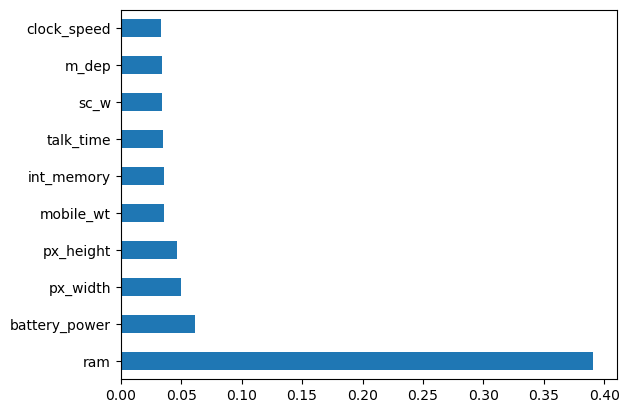

In [4]:
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix Heatmap

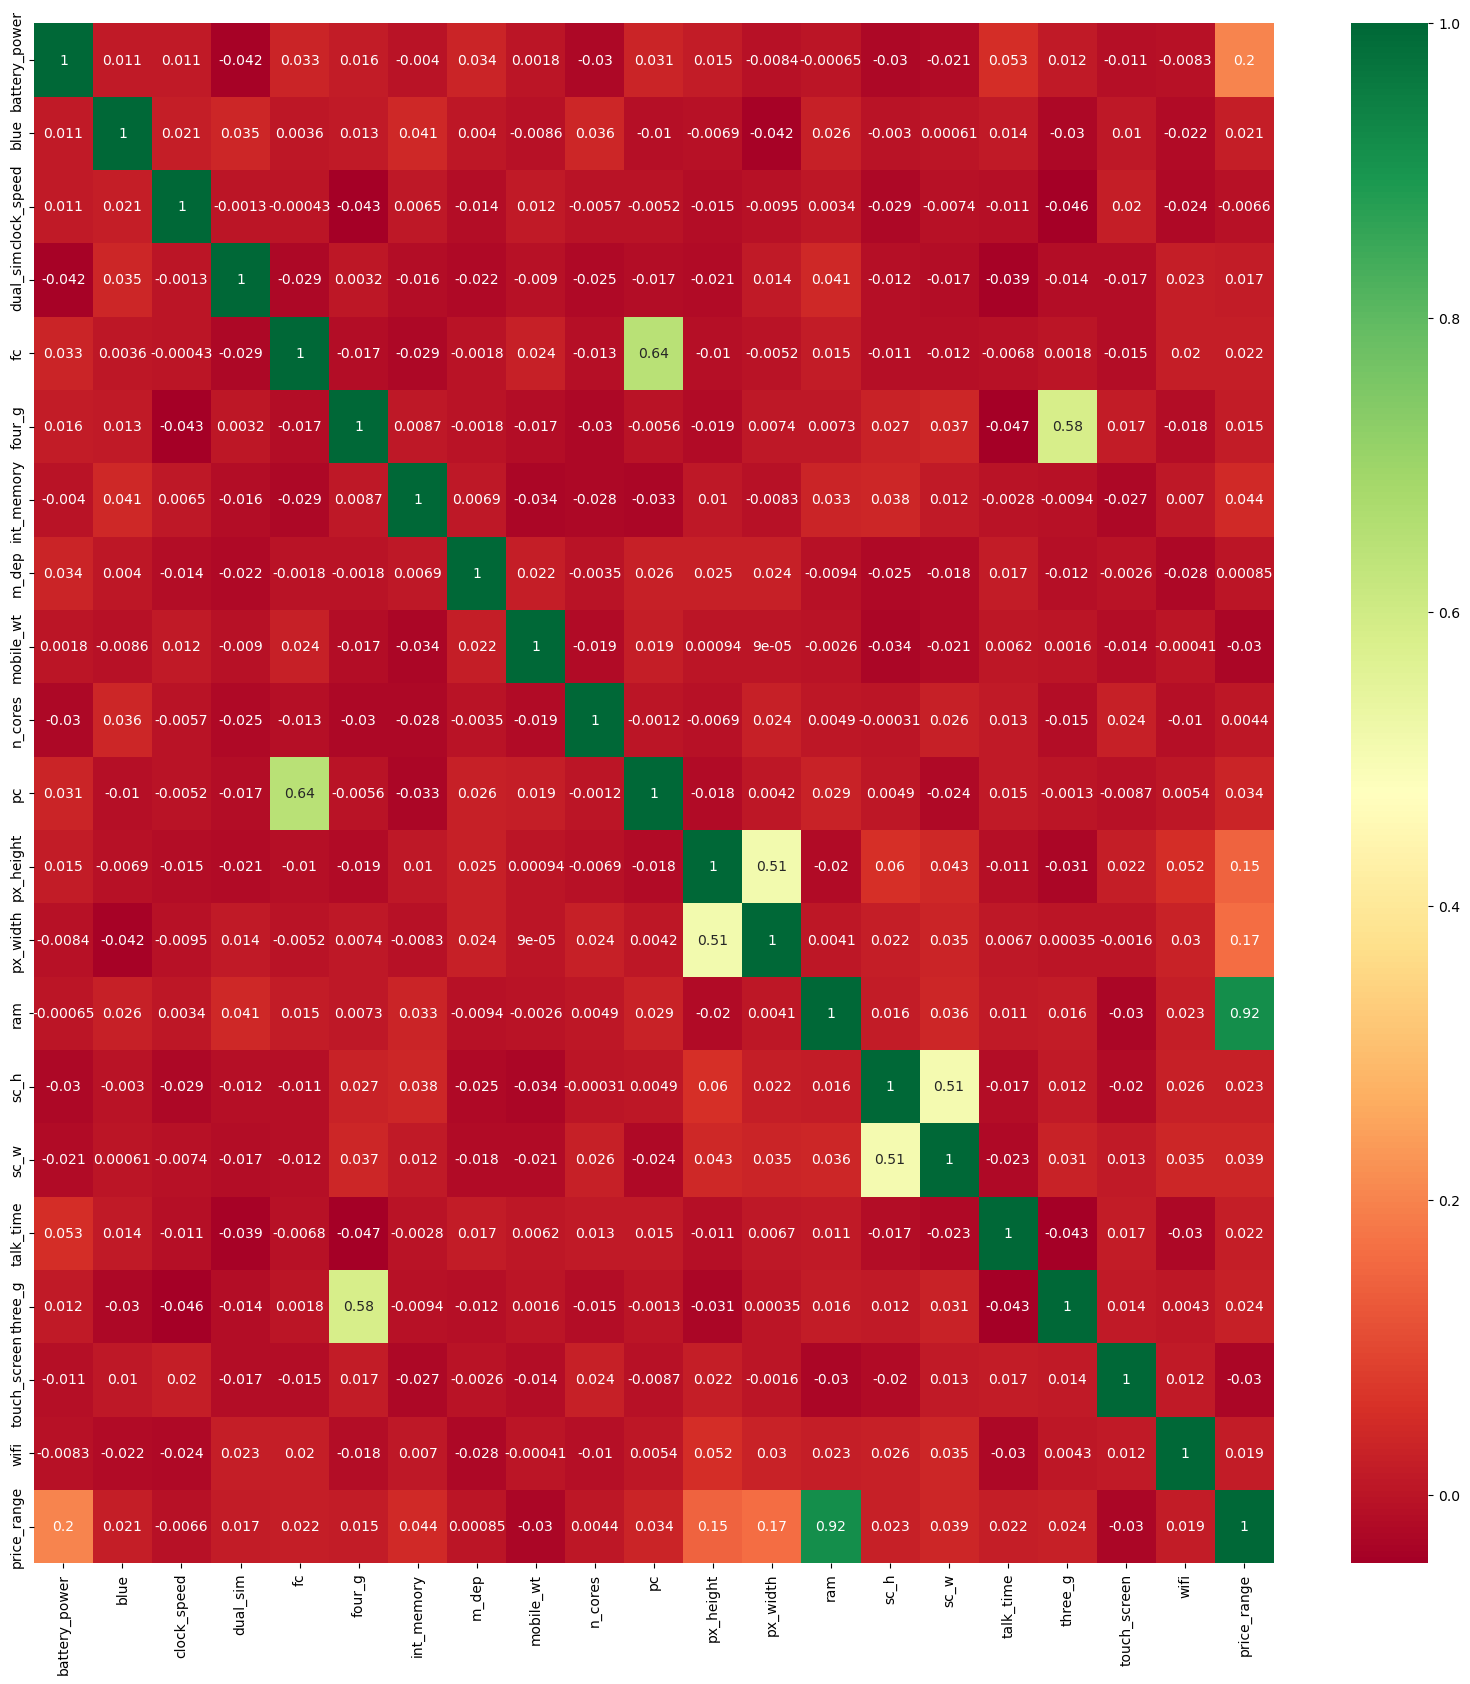

In [5]:
import seaborn as sns
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# II. Model Development Using Glass Dataset
### 1. Data Exploration
- Load the dataset using `pandas`
- Inspect data types, structure, and missing values

In [6]:
import pandas as pd

#Load the dataset
df = pd.read_csv('glass.csv')

#Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

#Check the shape of the dataset
print("\nDataset shape (rows, columns):", df.shape)

#Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
print(df.iloc[:, -1].value_counts())

First 5 rows of the dataset:
   idno       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  type
0     1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1     2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2     3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3     4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4     5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset shape (rows, columns): (214, 11)

Missing values per column:
idno    0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

Number of duplicate rows: 0
type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


### 2. Data Preprocessing
- **Data Cleaning:** Handle missing values if any, fix anomalies
- **Data Transformation:** Normalize or standardize the features if necessary

In [2]:
# data_preprocessing.py
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset WITHOUT headers
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass = pd.read_csv('glass.csv', header=None, names=column_names)

# Handle duplicates
initial_count = len(glass)
glass = glass.drop_duplicates()
print(f"Removed {initial_count - len(glass)} duplicate rows")
print(f"New shape: {glass.shape}")

# Check data types
print("\nChecking data types:")
print(glass.dtypes)

# Convert all feature columns to numeric
feature_cols = glass.columns[:-1]
glass[feature_cols] = glass[feature_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print("\nMissing values after conversion:")
print(glass.isnull().sum())

# Drop rows with missing data
glass = glass.dropna()
print(f"\nShape after dropping missing values: {glass.shape}")

# Remove outliers using IQR method
def remove_outliers(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

initial_rows = len(glass)
glass = remove_outliers(glass, feature_cols)
print(f"\nRemoved {initial_rows - len(glass)} outlier rows")
print(f"New shape after outlier removal: {glass.shape}")

# Remove constant features BEFORE scaling
constant_features = []
for col in feature_cols:
    if glass[col].nunique() == 1:  # Check if feature has only one unique value
        constant_features.append(col)

if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    glass = glass.drop(columns=constant_features)
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Separate features and target
X = glass[feature_cols]
y = glass['GlassType']  # Should be intact

# Scale features only
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)

# Combine scaled features with target
preprocessed = pd.concat([X_scaled, y], axis=1)

# Save
preprocessed.to_csv('preprocessed_glass.csv', index=False)
print("\nPreprocessed data saved to 'preprocessed_glass.csv'")

# Diagnostics
print("\nFirst 5 rows of preprocessed data:")
print(preprocessed.head())
print(f"\nFinal features: {feature_cols}")

Removed 1 duplicate rows
New shape: (214, 10)

Checking data types:
RI           object
Na           object
Mg           object
Al           object
Si           object
K            object
Ca           object
Ba           object
Fe           object
GlassType    object
dtype: object

Missing values after conversion:
RI           1
Na           1
Mg           1
Al           1
Si           1
K            1
Ca           1
Ba           1
Fe           1
GlassType    0
dtype: int64

Shape after dropping missing values: (213, 10)

Removed 109 outlier rows
New shape after outlier removal: (104, 10)

Removing constant features: ['Ba']

Preprocessed data saved to 'preprocessed_glass.csv'

First 5 rows of preprocessed data:
         RI        Na        Mg        Al        Si         K        Ca  \
2  0.292266  2.265044  0.409689 -0.123542 -0.234911 -1.548993 -1.623524   
3 -1.134714  1.234503  0.186612  0.848185  0.475602 -2.877917 -1.766445   
4  0.342160  0.318466  0.811226 -0.501436 -0.562840 -0

### 3. Model Development
- Train a Naive Bayes model using the entire feature set

### 3.1 Univariate Selection


a. Top 5 features (Univariate Selection):
  Feature    F_Value
6      Ca  11.392931
3      Al  10.664570
4      Si   6.065513
0      RI   4.794891
2      Mg   2.492662


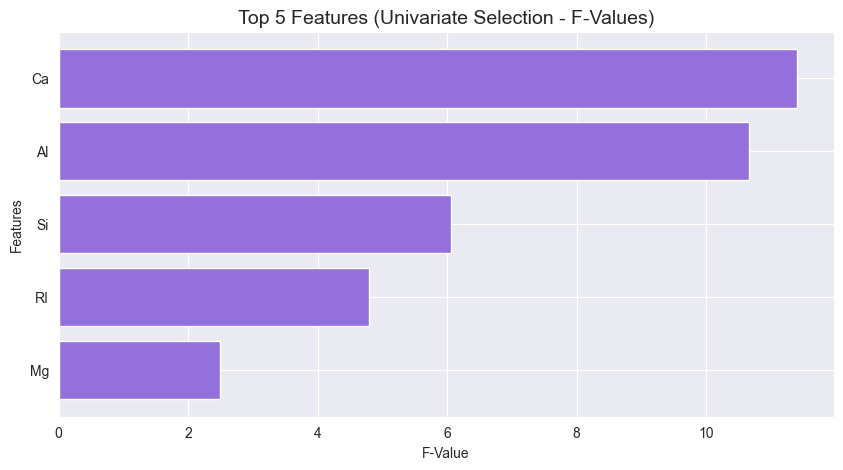

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt

# Load preprocessed data
data = pd.read_csv('preprocessed_glass.csv')
X = data.drop('GlassType', axis=1)
y = data['GlassType']

# a. Univariate Selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
univariate_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Value': selector.scores_
}).sort_values('F_Value', ascending=False)

top_5_univariate = univariate_scores.head(5)['Feature'].tolist()
print("\na. Top 5 features (Univariate Selection):")
print(univariate_scores.head(5))

top5_uni = univariate_scores.head(5)

plt.figure(figsize=(10, 5))
plt.barh(top5_uni['Feature'], top5_uni['F_Value'], color='mediumpurple')
plt.title('Top 5 Features (Univariate Selection - F-Values)', fontsize=14)
plt.xlabel('F-Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### 3.2 Feature Selection


b. Top 5 features (Feature Importance):
  Feature  Importance
0      RI    0.193597
3      Al    0.151676
2      Mg    0.136847
6      Ca    0.136803
4      Si    0.115967


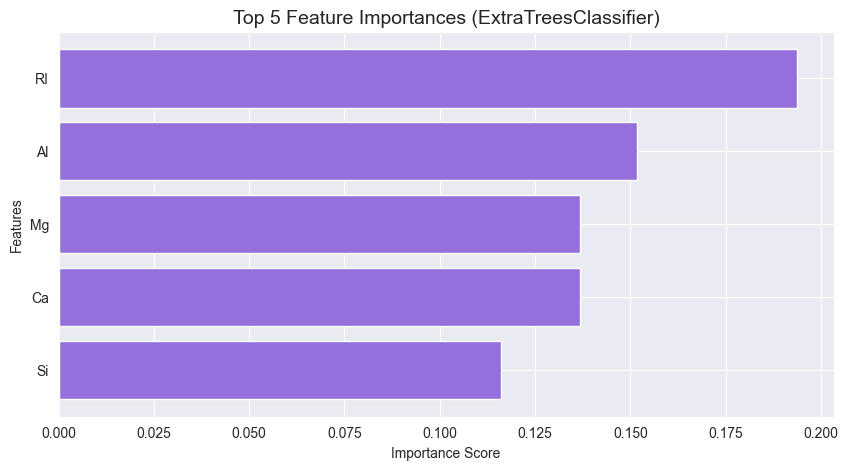

In [4]:
model = ExtraTreesClassifier(random_state=10)
model.fit(X, y)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)


top_5_importance = importance.head(5)['Feature'].tolist()
print("\nb. Top 5 features (Feature Importance):")
print(importance.head(5))
top5 = importance.head(5)


plt.figure(figsize=(10, 5))
plt.barh(top5['Feature'], top5['Importance'], color='mediumpurple')
plt.title('Top 5 Feature Importances (ExtraTreesClassifier)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### 3.3 Correlation

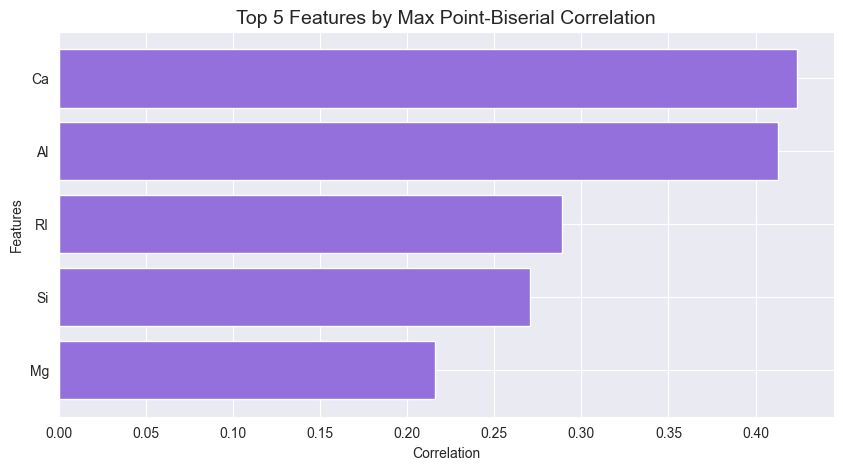

In [5]:
correlation_results = []
for feature in X.columns:
    max_abs_corr = 0
    for cls in y.unique():
        binary_target = (y == cls).astype(int)
        corr, _ = pointbiserialr(binary_target, X[feature])
        if not np.isnan(corr):
            max_abs_corr = max(max_abs_corr, abs(corr))
    correlation_results.append(max_abs_corr)


correlation_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlation_results
}).sort_values('Correlation', ascending=False)
top5_corr = correlation_df.head(5)


# Plotting the top 5 correlations
plt.figure(figsize=(10, 5))
plt.barh(top5_corr['Feature'], top5_corr['Correlation'], color='mediumpurple')
plt.title('Top 5 Features by Max Point-Biserial Correlation', fontsize=14)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### 4. Model Evaluation


Evaluating model with: All Features
Mean Accuracy: 0.7083 ± 0.1239

Evaluating model with: Univariate Selection
Mean Accuracy: 0.7333 ± 0.0687

Evaluating model with: Feature Importance
Mean Accuracy: 0.7333 ± 0.0687

Evaluating model with: Correlation
Mean Accuracy: 0.7333 ± 0.0687

Final Results:
            Feature Set  Mean Accuracy  Std Accuracy
0          All Features       0.708333      0.123884
1  Univariate Selection       0.733333      0.068718
2    Feature Importance       0.733333      0.068718
3           Correlation       0.733333      0.068718

Detailed Performance Metrics for Each Feature Set

Detailed Evaluation for Univariate Selection
Features: ['Ca', 'Al', 'Si', 'RI', 'Mg']

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62         9
           2       0.64      0.70      0.67        10
           3       0.33      0.50      0.40         2

    accuracy                           0.62        21


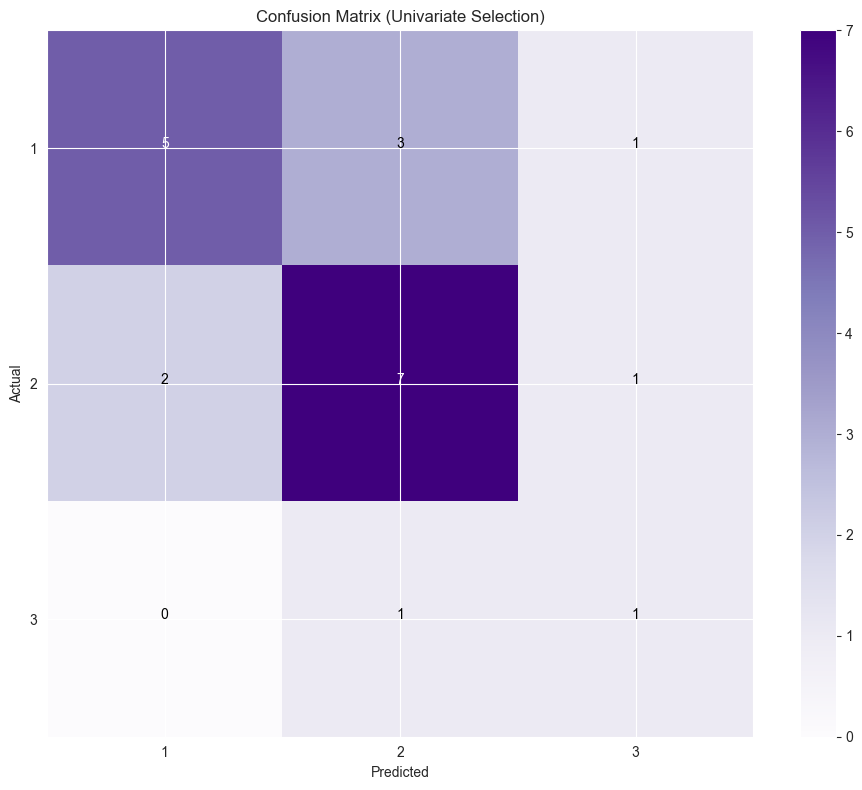


Detailed Evaluation for Feature Importance
Features: ['RI', 'Al', 'Mg', 'Ca', 'Si']

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62         9
           2       0.64      0.70      0.67        10
           3       0.33      0.50      0.40         2

    accuracy                           0.62        21
   macro avg       0.56      0.59      0.56        21
weighted avg       0.64      0.62      0.62        21



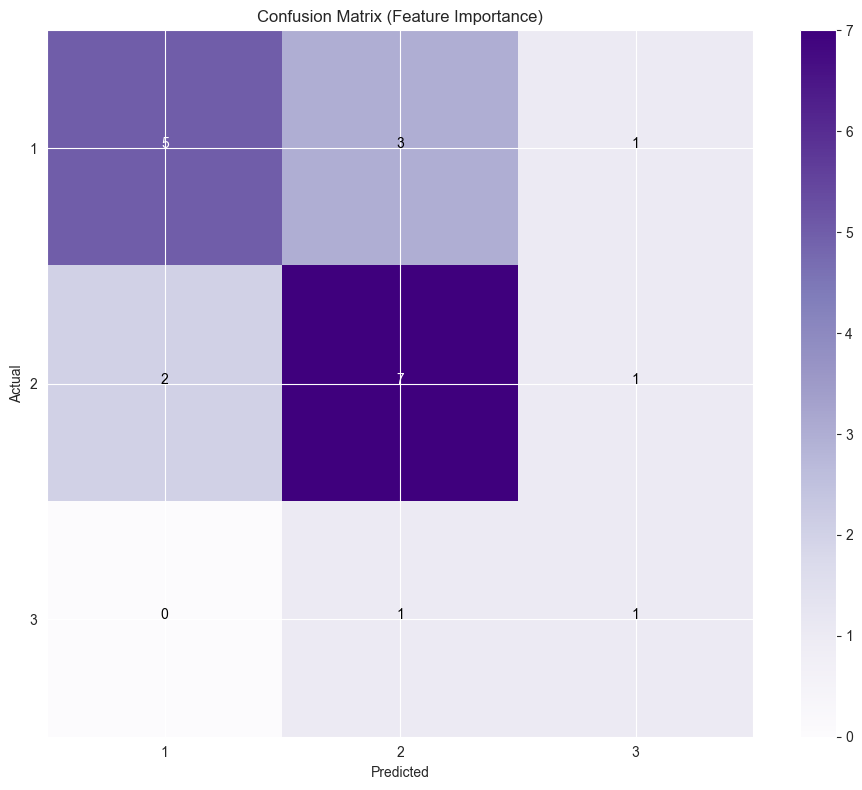


Detailed Evaluation for Correlation
Features: ['Ca', 'Al', 'RI', 'Si', 'Mg']

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62         9
           2       0.64      0.70      0.67        10
           3       0.33      0.50      0.40         2

    accuracy                           0.62        21
   macro avg       0.56      0.59      0.56        21
weighted avg       0.64      0.62      0.62        21



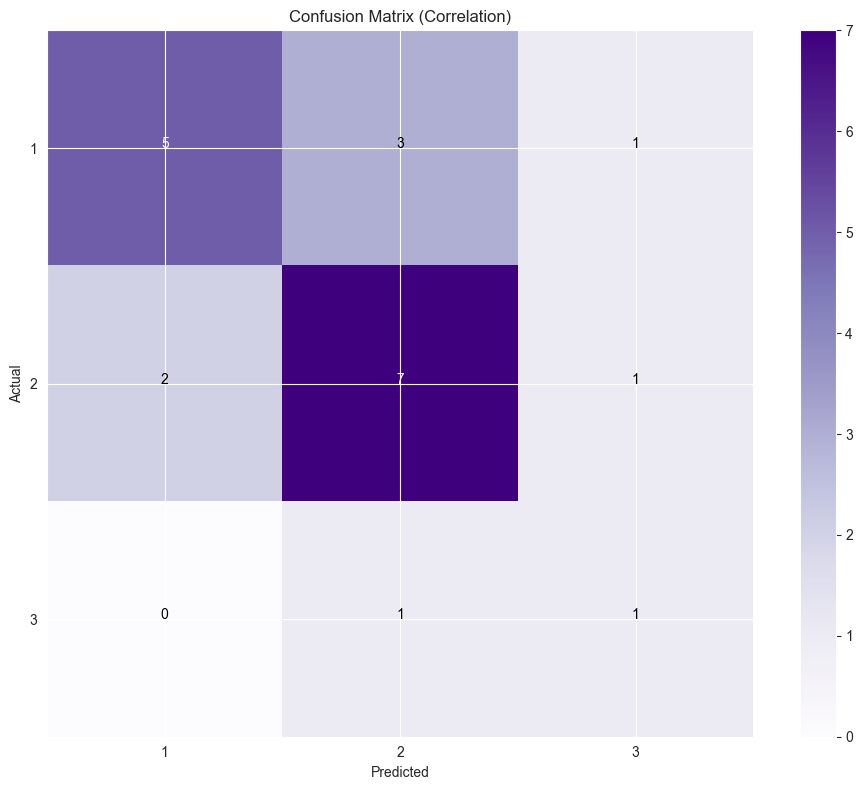


Detailed Evaluation for All Features
Features: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe']

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.44      0.50         9
           2       0.70      0.70      0.70        10
           3       0.25      0.50      0.33         2

    accuracy                           0.57        21
   macro avg       0.51      0.55      0.51        21
weighted avg       0.60      0.57      0.58        21



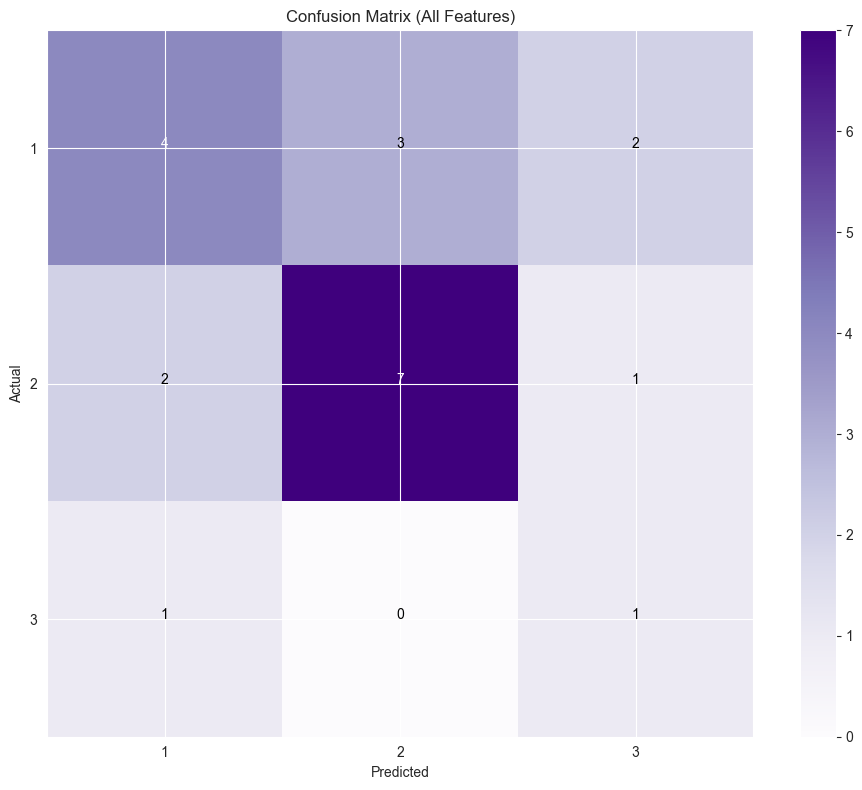


Performance Metrics Summary
            Feature Set  Accuracy  F1 Score
0  Univariate Selection  0.619048  0.623413
1    Feature Importance  0.619048  0.623413
2           Correlation  0.619048  0.623413
3          All Features  0.571429  0.579365


In [9]:
# model_evaluation.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score  # Added f1_score here
from sklearn.model_selection import train_test_split

# Load preprocessed data
df = pd.read_csv('preprocessed_glass.csv')
X = df.drop('GlassType', axis=1)
y = df['GlassType']

# Feature sets from previous selection
feature_sets = {
    'All Features': X.columns.tolist(),
    'Univariate Selection': ['Ca', 'Al', 'Si', 'RI', 'Mg'],
    'Feature Importance': ['RI', 'Al', 'Mg', 'Ca', 'Si'],
    'Correlation': ['Ca', 'Al', 'RI', 'Si', 'Mg']
}

# Fixed manual cross-validation
def manual_cross_validation(X, y, feature_set, n_splits=8, test_size=0.2, random_state=10):
    np.random.seed(random_state)
    n_samples = len(X)
    test_size_int = max(1, int(n_samples * test_size))  # Ensure at least 1 sample
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    accuracies = []

    for i in range(n_splits):
        # Create proper test indices
        test_start = i * test_size_int
        test_end = min((i + 1) * test_size_int, n_samples)
        test_indices = indices[test_start:test_end]

        # Create train indices (all except test)
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        # Ensure we have samples in both sets
        if len(train_indices) == 0 or len(test_indices) == 0:
            continue

        # Get data subsets
        X_train = X.iloc[train_indices][feature_set]
        X_test = X.iloc[test_indices][feature_set]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]

        # Train and evaluate model
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return np.mean(accuracies), np.std(accuracies)

# Train and evaluate models
results = []
for feature_name, features in feature_sets.items():
    print(f"\nEvaluating model with: {feature_name}")
    mean_acc, std_acc = manual_cross_validation(X, y, features)
    results.append({
        'Feature Set': feature_name,
        'Mean Accuracy': mean_acc,
        'Std Accuracy': std_acc
    })
    print(f"Mean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

# Display results
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("Final Results:")
print("="*50)
print(results_df[['Feature Set', 'Mean Accuracy', 'Std Accuracy']])

# ===================================================================
# Detailed Performance Metrics for Each Feature Set
# ===================================================================

def evaluate_and_report(feature_set_name, features):
    """Evaluate and report detailed metrics for a feature set"""
    print(f"\n{'='*50}")
    print(f"Detailed Evaluation for {feature_set_name}")
    print(f"Features: {features}")
    print('='*50)

    # Final train-test split
    X_set = X[features]
    X_train, X_test, y_train, y_test = train_test_split(
        X_set, y, test_size=0.2, random_state=10, stratify=y
    )

    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Purples')
    plt.title(f'Confusion Matrix ({feature_set_name})')
    plt.colorbar()

    classes = sorted(y.unique())
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max()/2 else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{feature_set_name.replace(" ", "_")}.png')
    plt.show()

    # Return metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

# Evaluate and report for each feature set
print("\n" + "="*50)
print("Detailed Performance Metrics for Each Feature Set")
print("="*50)

# Univariate Selection
uni_accuracy, uni_f1 = evaluate_and_report(
    "Univariate Selection",
    feature_sets['Univariate Selection']
)

# Feature Importance
fi_accuracy, fi_f1 = evaluate_and_report(
    "Feature Importance",
    feature_sets['Feature Importance']
)

# Correlation
corr_accuracy, corr_f1 = evaluate_and_report(
    "Correlation",
    feature_sets['Correlation']
)

# All Features
all_accuracy, all_f1 = evaluate_and_report(
    "All Features",
    feature_sets['All Features']
)

# Summary Table
print("\n" + "="*50)
print("Performance Metrics Summary")
print("="*50)
summary_df = pd.DataFrame({
    'Feature Set': ['Univariate Selection', 'Feature Importance', 'Correlation', 'All Features'],
    'Accuracy': [uni_accuracy, fi_accuracy, corr_accuracy, all_accuracy],
    'F1 Score': [uni_f1, fi_f1, corr_f1, all_f1]
})
print(summary_df)